In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

from conf.settings import (
    get_settings, Settings,
    get_read_file_settings, ReadFileSettings,
)
from recsys_tasks.processors.cluster_size import ClusterSizeProcessor


In [2]:
# Получение конфигурации для расчетов.
settings: Settings = get_settings()
read_file_settings: ReadFileSettings = get_read_file_settings()

In [3]:
# Функция для отображения результатов работы процессора
def display_processor_output(union_iterations):
    for iter_idx, union_iteration in enumerate(union_iterations):
        print(
            f'Итерация #{iter_idx + 1}: объединение элементов {union_iteration.union_indices}.\n'
            f'Значение: {union_iteration.value}'
        )
        
        names = [
            ', '.join(map(str, iteration_indices))
            for iteration_indices in union_iteration.index_map.values()
        ]

        matrix_repr = pd.DataFrame(
            data=union_iteration.result_matrix,
            index=names,
            columns=names,
        )
        display(matrix_repr)

### 1. Проверка размера кластара на примере из задания

In [4]:
# Получение матричного представления исходных данных.
input_data_folder = '2_cluster_size'
input_data_filename = 'example.csv'
input_data_filepath = settings.INPUT_DATA_DIR / input_data_folder / input_data_filename

source_data: np.ndarray = np.genfromtxt(
    input_data_filepath,
    dtype=float,
    **read_file_settings.model_dump(),
)
source_data: np.ndarray[tuple[int, int], float]
source_data

array([[-1.  ,  0.95,  0.9 ,  0.85,  0.8 ],
       [-1.  , -1.  ,  0.75,  0.7 ,  0.65],
       [-1.  , -1.  , -1.  ,  0.6 ,  0.8 ],
       [-1.  , -1.  , -1.  , -1.  ,  0.7 ],
       [-1.  , -1.  , -1.  , -1.  , -1.  ]])

In [5]:
processor = ClusterSizeProcessor(source_data)
result = processor(0.85)

display_processor_output(result)

Итерация #1: объединение элементов ([0], [1]).
Значение: 0.95


,"0, 1",2,3,4
"0, 1",-1.0,0.9,0.85,0.8
2,-1.0,-1.0,0.60,0.8
3,-1.0,-1.0,-1.00,0.7
4,-1.0,-1.0,-1.00,-1.0


Итерация #2: объединение элементов ([0, 1], [2]).
Значение: 0.9


,"0, 1, 2",3,4
"0, 1, 2",-1.0,0.85,0.8
3,-1.0,-1.00,0.7
4,-1.0,-1.00,-1.0


Итерация #3: объединение элементов ([0, 1, 2], [3]).
Значение: 0.85


,"0, 1, 2, 3",4
"0, 1, 2, 3",-1.0,0.8
4,-1.0,-1.0


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0]],
 'dcoord': [[0.0, np.float64(0.95), np.float64(0.95), 0.0],
  [np.float64(0.95), np.float64(0.9), np.float64(0.9), 0.0],
  [np.float64(0.9), np.float64(0.85), np.float64(0.85), 0.0]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0']}

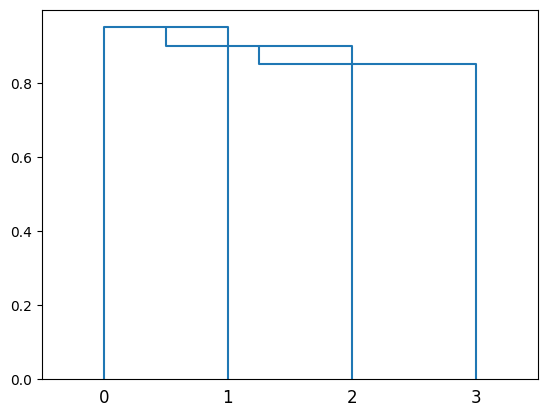

In [6]:
# Построение дендрограммы объединений.
dendrogram(processor.dendrogram_info)

### 2. Проверка размера кластера на примере из резултатов обработки прошлого задания

In [7]:
# Получение матричного представления исходных данных.
input_data_folder = '2_cluster_size'
input_data_filename = 'task_1_users.csv'
input_data_filepath = settings.INPUT_DATA_DIR / input_data_folder / input_data_filename

source_data: np.ndarray = np.genfromtxt(
    input_data_filepath,
    dtype=float,
    **read_file_settings.model_dump(),
)
source_data: np.ndarray[tuple[int, int], float]
source_data

array([[-1.        ,  0.88281509,  0.9929078 ,  0.78652574,  0.85863549],
       [-1.        , -1.        ,  0.89164324,  0.94138757,  0.89824939],
       [-1.        , -1.        , -1.        ,  0.80165124,  0.82209781],
       [-1.        , -1.        , -1.        , -1.        ,  0.83768   ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [8]:
processor = ClusterSizeProcessor(source_data)
result = processor(0.8)

display_processor_output(result)

Итерация #1: объединение элементов ([0], [2]).
Значение: 0.9929078


,"0, 2",1,3,4
"0, 2",-1.0,0.891643,0.801651,0.858635
1,-1.0,-1.000000,0.941388,0.898249
3,-1.0,-1.000000,-1.000000,0.837680
4,-1.0,-1.000000,-1.000000,-1.000000


Итерация #2: объединение элементов ([1], [3]).
Значение: 0.94138757


,"0, 2","1, 3",4
"0, 2",-1.0,0.891643,0.858635
"1, 3",-1.0,-1.000000,0.898249
4,-1.0,-1.000000,-1.000000


Итерация #3: объединение элементов ([1, 3], [4]).
Значение: 0.89824939


,"0, 2","1, 3, 4"
"0, 2",-1.0,0.891643
"1, 3, 4",-1.0,-1.000000


Итерация #4: объединение элементов ([0, 2], [1, 3, 4]).
Значение: 0.89164324


,"0, 2, 1, 3, 4"
"0, 2, 1, 3, 4",-1.0


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [10.0, 10.0, 37.5, 37.5]],
 'dcoord': [[0.0, np.float64(0.9929078), np.float64(0.9929078), 0.0],
  [0.0, np.float64(0.94138757), np.float64(0.94138757), 0.0],
  [np.float64(0.94138757),
   np.float64(0.89824939),
   np.float64(0.89824939),
   0.0],
  [np.float64(0.9929078),
   np.float64(0.89164324),
   np.float64(0.89164324),
   np.float64(0.89824939)]],
 'ivl': ['0', '2', '1', '3', '4'],
 'leaves': [0, 2, 1, 3, 4],
 'color_list': ['C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C0']}

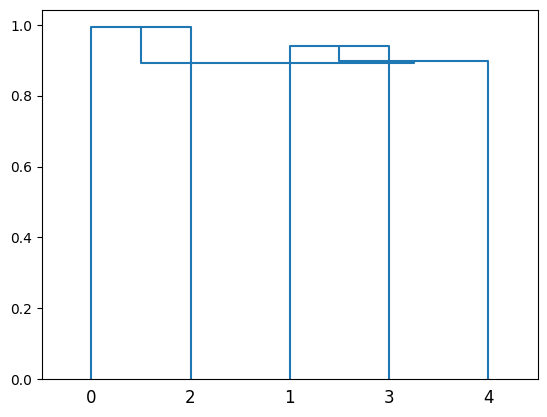

In [9]:
# Построение дендрограммы объединений.
dendrogram(processor.dendrogram_info)